In [150]:
import cv2
import numpy as np
import pywt
from matplotlib import pyplot as plt

## part 1 

In [151]:
file_path = './C1HW06-2022/Part 1 Image/IP_dog.bmp'
im = cv2.imread(file_path)
# plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
# plt.title("origin image")

### Trapezoidal Transformation
#### 兩個 slider

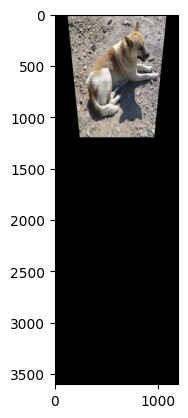

In [152]:
def Trapezoidal(img, horizontal_val, vertical_val):
    # img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    k = horizontal_val # 水平調整（0-0.5)
    h = vertical_val   # 垂直調整（>= 1）
    height, width = img.shape[:2]
    value = k * height
    resize_gray = np.zeros([int(height * h), width], np.uint8)
    for i in range (height) :
        temp = int( value + k * i ) 
        for j in range (temp, width - temp) :
            #每行非黑色區域的長度
            distance = int(width-temp) - int(temp-5)
            #缩小倍率
            ratio = distance / width
            #取點距離
            stepsize = 1.0 / ratio
            #將同一行缩小相同倍率
            resize_gray[i][j] = img[i][int((j - temp) * stepsize)]
    return resize_gray
    
a1 = Trapezoidal(im[..., 0], 0.1, 3)
a2 = Trapezoidal(im[..., 1], 0.1, 3)
a3 = Trapezoidal(im[..., 2], 0.1, 3)

a = cv2.merge((a1, a2, a3))
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))


### Wavy Transformation
#### one slide
#### two radio button

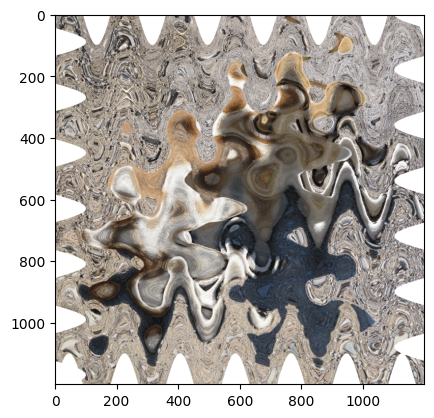

In [153]:
#垂直+水平方向變形
def Wavy(img, amplitude, horizontal = 1, vertical = 1):
    # image =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = img
    rows, cols = image.shape
    result = np.zeros(image.shape, dtype = image.dtype)   
    for i in range(rows):
        for j in range(cols):

            offset_x = horizontal * amplitude * np.cos(2 * np.pi * i / 180) # x=u+振幅*sin(2.0*π*v/頻率)
            offset_y = vertical * amplitude * np.sin(2 * np.pi * j / 180) # y=v+振幅*sin(2.0*π*u/頻率)

            if (j + offset_x < cols) and (i + offset_y < rows) and (j + offset_x > 0) and (i + offset_y > 0):
                result[i, j] = image[int(i + offset_y) % rows, int(j + offset_x) % cols]

            else:
                result[i, j] = 255
    return result 

b1 = Wavy(im[..., 0], 100, 1, 1)
b2 = Wavy(im[..., 1], 100, 1, 1)
b3 = Wavy(im[..., 2], 100, 1, 1)
b = cv2.merge((b3, b2, b1))
plt.imshow(b)
# plt.imshow(Wavy(im), cmap='img_gray')

### Circular Transformation
#### one slider

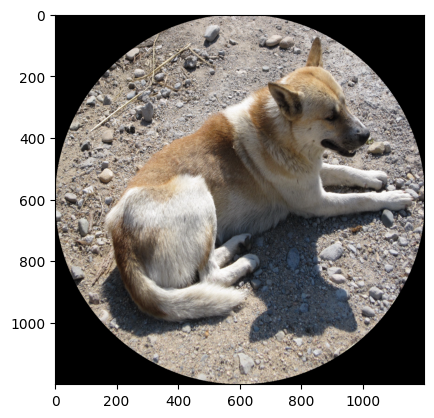

In [154]:
img = im
def Circular(img, cir_radius_percent):
    height, width = img.shape[0], img.shape[1]
    heights, widths = img.shape[:2]
    heights = int(heights)
    widths = int(widths)
    radius = int(min(height, width) // 2 * cir_radius_percent / 100)
    #生成內顯示模板
    circleIn = np.zeros((heights, widths, 1), np.uint8)
    circleIn = cv2.circle(circleIn, (width // 2, height // 2), radius, (1), -1)
    #生成外顯示模板
    circleOut = circleIn.copy()
    circleOut[circleOut == 0] = 2
    circleOut[circleOut == 1] = 0
    circleOut[circleOut == 2] = 1
    #原圖與内顯示模板融合
    #生成空白陣列
    imgIn = np.zeros((height, width, 4), np.uint8)
    #複製前3個通道
    imgIn[:, :, 0] = np.multiply(img[:, :, 0], circleIn[:, :, 0])
    imgIn[:, :, 1] = np.multiply(img[:, :, 1], circleIn[:, :, 0])
    imgIn[:, :, 2] = np.multiply(img[:, :, 2], circleIn[:, :, 0])
    # 設置α通道的不透明部分
    circleIn[circleIn == 1] = 255
    imgIn[:, :, 3] = circleIn[:, :, 0]
    return imgIn # 彩色影像
plt.imshow(cv2.cvtColor(Circular(im, 100), cv2.COLOR_BGR2RGB))

# Part 2 (學長的code)

Text(0.5, 1.0, 'multifocus3')

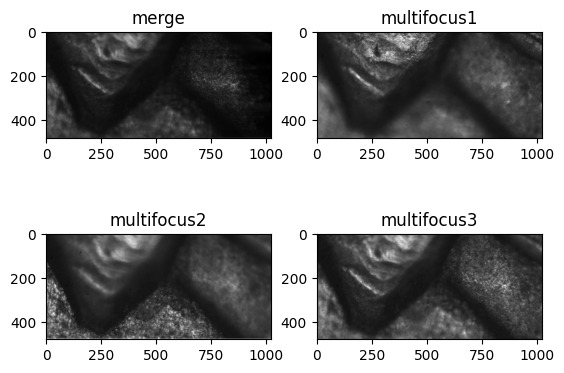

In [155]:
imgA = cv2.imread("./C1HW06-2022/Part 2 Images/Image Set 2/multifocus1.JPG",) #載入圖片A
imgB = cv2.imread("./C1HW06-2022/Part 2 Images/Image Set 2/multifocus2.JPG") #載入圖片B
heigh, wide, channel = imgA.shape #获取图像的高、宽、通道数

#臨時變數、存儲哈爾小波處理的數據#
tempA1 = []                   #
tempA2 = []                   #
tempB1 = []                   #
tempB2 = []                   #

waveImgA = np.zeros((heigh, wide, channel), np.float32) #存储A圖片小波處理數據的變數
waveImgB = np.zeros((heigh, wide, channel), np.float32) #存储B圖片小波處理數據的變數

#水平方向的哈爾小波處理，對圖片的B、G、R三个通道分别進行
for c in range(channel):
    for x in range(heigh):
        for y in range(0,wide,2):
            tempA1.append((float(imgA[x,y,c]) + float(imgA[x,y+1,c]))/2) 
            tempA2.append((float(imgA[x,y,c]) + float(imgA[x,y+1,c]))/2 - float(imgA[x,y,c])) 
            tempB1.append((float(imgB[x,y,c]) + float(imgB[x,y+1,c]))/2) 
            tempB2.append((float(imgB[x,y,c]) + float(imgB[x,y+1,c]))/2 - float(imgB[x,y,c])) 
        tempA1 = tempA1 + tempA2 
        tempB1 = tempB1 + tempB2 
        for i in range(len(tempA1)):
            waveImgA[x,i,c] = tempA1[i] 
            waveImgB[x,i,c] = tempB1[i] 
        tempA1 = [] 
        tempA2 = [] 
        tempB1 = []
        tempB2 = []

#垂直方向哈爾小波處理，與水平方向同理
for c in range(channel):
    for y in range(wide):
        for x in range(0,heigh-1,2):
            tempA1.append((float(waveImgA[x,y,c]) + float(waveImgA[x+1,y,c]))/2)
            tempA2.append((float(waveImgA[x,y,c]) + float(waveImgA[x+1,y,c]))/2 - float(waveImgA[x,y,c]))
            tempB1.append((float(waveImgB[x,y,c]) + float(waveImgB[x+1,y,c]))/2)
            tempB2.append((float(waveImgB[x,y,c]) + float(waveImgB[x+1,y,c]))/2 - float(waveImgB[x,y,c]))
        tempA1 = tempA1 + tempA2
        tempB1 = tempB1 + tempB2
        for i in range(len(tempA1)):
            waveImgA[i,y,c] = tempA1[i]
            waveImgB[i,y,c] = tempB1[i]
        tempA1 = []
        tempA2 = []
        tempB1 = []
        tempB2 = []

#求以x,y为中心的5x5矩陣的方差
varImgA = np.zeros((heigh//2, wide//2, channel), np.float32) #將圖像A中低频數據求方差後存储的變數
varImgB = np.zeros((heigh//2, wide//2, channel), np.float32) #將像B中低频數據求方差後存储的變數
for c in range(channel):
    for x in range(heigh//2):
        for y in range(wide//2):
        #############################
        #對圖片邊界的像素點進行處理
            if x - 3 < 0:
                up = 0
            else:
                up = x - 3
            if x + 3 > heigh//2:
                down = heigh//2
            else:
                down = x + 3
            if y - 3 < 0:
                left = 0
            else:
                left = y - 3
            if y + 3 > wide//2:
                right = wide//2
            else:
                right = y + 3
        
        meanA, varA = cv2.meanStdDev(waveImgA[up:down,left:right,c]) #求圖片A以x,y為中心的5x5矩陣的方差，mean表示平均值，var表示方差
        meanB, varB = cv2.meanStdDev(waveImgB[up:down,left:right,c]) #求圖片B以x,y為中心的5x5矩陣的方差

        varImgA[x,y,c] = varA #將圖片A對應位置像素的方差存储在變數中
        varImgB[x,y,c] = varB #將圖片B對應位置像素的方差存储在變數中
        
        #求兩圖的權重
weightImgA = np.zeros((heigh//2, wide//2, channel), np.float32) 
weightImgB = np.zeros((heigh//2, wide//2, channel), np.float32) 
for c in range(channel):
    for x in range(heigh//2):
        for y in range(wide//2):
            weightImgA[x,y,c] = varImgA[x,y,c] / (varImgA[x,y,c]+varImgB[x,y,c]+0.00000001) 
            weightImgB[x,y,c] = varImgB[x,y,c] / (varImgA[x,y,c]+varImgB[x,y,c]+0.00000001) 

#進行融合，高頻————係数绝对值最大化，低頻————局部方差準則
reImgA = np.zeros((heigh, wide, channel), np.float32) 
reImgB = np.zeros((heigh, wide, channel), np.float32)
for c in range(channel):
    for x in range(heigh):
        for y in range(wide):
            if x < heigh//2 and y < wide//2:
                reImgA[x,y,c] = weightImgA[x,y,c]*waveImgA[x,y,c] + weightImgB[x,y,c]*waveImgB[x,y,c] #對兩張圖片低頻的地方進行權值融合數據
            else:
                reImgA[x,y,c] = waveImgA[x,y,c] if abs(waveImgA[x,y,c]) >= abs(waveImgB[x,y,c]) else waveImgB[x,y,c] #對兩張高頻的進行绝對值係数最大規則融合

#垂直方向進行重購
for c in range(channel):
    for y in range(wide):
        for x in range(heigh):
            if x%2 == 0:
                reImgB[x,y,c] = reImgA[x//2,y,c] - reImgA[x//2 + heigh//2,y,c] #根據哈爾小波原理，將重購的數據存儲在臨時變數中
            else:
                reImgB[x,y,c] = reImgA[x//2,y,c] + reImgA[x//2 + heigh//2,y,c] #圖片的前半段是低頻，後半段是高頻

#水平方向進行重構，與垂直方向同理
for c in range(channel):
    for x in range(heigh):
        for y in range(wide):
            if y%2 ==0:
                reImgA[x,y,c] = reImgB[x,y//2,c] - reImgB[x,y//2 + wide//2,c]
            else:
                reImgA[x,y,c] = reImgB[x,y//2,c] + reImgB[x,y//2 + wide//2,c]
#限制圖像的範圍(0-255),若不限制，根據np.astype(np.uint8)的規則，會對圖片產生噪聲
reImgA[reImgA[:, :, :] < 0] = 0
reImgA[reImgA[:, :, :] > 255] = 255

# cv2.imwrite('multifocusO.JPG', reImgA.astype(np.uint8))

#------------------------------------------------------------------------------
#載入新生成的圖片，進行三張圖片的小波轉換
imgC = reImgA.astype(np.uint8)
imgD = cv2.imread("./C1HW06-2022/Part 2 Images/Image Set 2/multifocus3.JPG") 
heigh1, wide1, channel1 = imgC.shape 

tempC1 = []                   
tempC2 = []                   
tempD1 = []                   
tempD2 = []                   

waveImgC = np.zeros((heigh1, wide1, channel1), np.float32) 
waveImgD = np.zeros((heigh1, wide1, channel1), np.float32) 

for c1 in range(channel1):
    for x1 in range(heigh1):
        for y1 in range(0,wide1,2):
            tempC1.append((float(imgC[x1,y1,c1]) + float(imgC[x1,y1+1,c1]))/2) 
            tempC2.append((float(imgC[x1,y1,c1]) + float(imgC[x1,y1+1,c1]))/2 - float(imgC[x1,y1,c1])) 
            tempD1.append((float(imgD[x1,y1,c1]) + float(imgD[x1,y1+1,c1]))/2) 
            tempD2.append((float(imgD[x1,y1,c1]) + float(imgD[x1,y1+1,c1]))/2 - float(imgD[x1,y1,c1]))
        tempC1 = tempC1 + tempC2 
        tempD1 = tempD1 + tempD2 
        for i1 in range(len(tempC1)):
            waveImgC[x1,i1,c1] = tempC1[i1] 
            waveImgD[x1,i1,c1] = tempD1[i1] 
        tempC1 = [] 
        tempC2 = [] 
        tempD1 = []
        tempD2 = []

for c1 in range(channel1):
    for y1 in range(wide1):
        for x1 in range(0,heigh1-1,2):
            tempC1.append((float(waveImgC[x1,y1,c1]) + float(waveImgC[x1+1,y1,c1]))/2)
            tempC2.append((float(waveImgC[x1,y1,c1]) + float(waveImgC[x1+1,y1,c1]))/2 - float(waveImgC[x1,y1,c1]))
            tempD1.append((float(waveImgD[x1,y1,c1]) + float(waveImgD[x1+1,y1,c1]))/2)
            tempD2.append((float(waveImgD[x1,y1,c1]) + float(waveImgD[x1+1,y1,c1]))/2 - float(waveImgD[x1,y1,c1]))
        tempC1 = tempC1 + tempC2
        tempD1 = tempD1 + tempD2
        for i1 in range(len(tempC1)):
            waveImgC[i1,y1,c1] = tempC1[i1]
            waveImgD[i1,y1,c1] = tempD1[i1]
        tempC1 = []
        tempC2 = []
        tempD1 = []
        tempD2 = []
varImgC = np.zeros((heigh1//2, wide1//2, channel1), np.float32) 
varImgD = np.zeros((heigh1//2, wide1//2, channel1), np.float32) 
for c1 in range(channel1):
    for x1 in range(heigh1//2):
        for y1 in range(wide1//2):
            if x1 - 3 < 0:
                up1 = 0
            else:
                up1 = x1 - 3
            if x1 + 3 > heigh1//2:
                down1 = heigh1//2
            else:
                down1 = x1 + 3
            if y1 - 3 < 0:
                left1 = 0
            else:
                left1 = y1 - 3
            if y + 3 > wide1//2:
                right1 = wide1//2
            else:
                right1 = y1 + 3
        
            meanC, varC = cv2.meanStdDev(waveImgC[up1:down1,left1:right1,c1])
            meanD, varD = cv2.meanStdDev(waveImgD[up1:down1,left1:right1,c1])
            
            varImgC[x1,y1,c1] = varC 
            varImgD[x1,y1,c1] = varD 


weightImgC = np.zeros((heigh1//2, wide1//2, channel1), np.float32) 
weightImgD = np.zeros((heigh1//2, wide1//2, channel1), np.float32) 
for c1 in range(channel1):
    for x1 in range(heigh1//2):
        for y1 in range(wide1//2):
            weightImgC[x1,y1,c1] = varImgC[x1,y1,c1] / (varImgC[x1,y1,c1]+varImgD[x1,y1,c1]+0.00000001) 
            weightImgD[x1,y1,c1] = varImgD[x1,y1,c1] / (varImgC[x1,y1,c1]+varImgD[x1,y1,c1]+0.00000001) 

reImgC = np.zeros((heigh1, wide1, channel1), np.float32) 
reImgD = np.zeros((heigh1, wide1, channel1), np.float32) 
for c1 in range(channel1):
    for x1 in range(heigh1):
        for y1 in range(wide1):
            if x1 < heigh1//2 and y1 < wide1//2:
                reImgC[x1,y1,c1] = weightImgC[x1,y1,c1]*waveImgC[x1,y1,c1] + weightImgD[x1,y1,c1]*waveImgD[x1,y1,c1] 
            else:
                reImgC[x1,y1,c1] = waveImgC[x1,y1,c1] if abs(waveImgC[x1,y1,c1]) >= abs(waveImgD[x1,y1,c1]) else waveImgD[x1,y1,c1] 

for c1 in range(channel1):
    for y1 in range(wide1):
        for x1 in range(heigh1):
            if x1%2 == 0:
                reImgD[x1,y1,c1] = reImgC[x1//2,y1,c1] - reImgC[x1//2 + heigh1//2,y1,c1] 
            else:
                reImgD[x1,y1,c1] = reImgC[x1//2,y1,c1] + reImgC[x1//2 + heigh1//2,y1,c1] 


for c1 in range(channel1):
    for x1 in range(heigh1):
        for y1 in range(wide1):
            if y1%2 ==0:
                reImgC[x1,y1,c1] = reImgD[x1,y1//2,c1] - reImgD[x1,y1//2 + wide1//2,c1]
            else:
                reImgC[x1,y1,c1] = reImgD[x1,y1//2,c1] + reImgD[x1,y1//2 + wide1//2,c1]

reImgC[reImgC[:, :, :] < 0] = 0
reImgC[reImgC[:, :, :] > 255] = 255

plt.subplot(2, 2, 1)
plt.imshow(reImgC.astype(np.uint8))
plt.title('merge')
plt.subplot(2, 2, 2)
plt.imshow(imgA)
plt.title('multifocus1')
plt.subplot(2, 2, 3)
plt.imshow(imgB)
plt.title('multifocus2')
plt.subplot(2, 2, 4)
plt.imshow(imgD)
plt.title('multifocus3')



# cv2.imwrite('multifocus.JPG', reImgC.astype(np.uint8))
# cv2.imshow("multifocus1", imgA)
# cv2.imshow("multifocus2", imgB)
# cv2.imshow("multifocus3", imgD)
# cv2.imshow("multifocus", reImgC.astype(np.uint8))
# cv2.waitKey(0)
# cv2.destroyAllWindows()



# Part 2 pywt

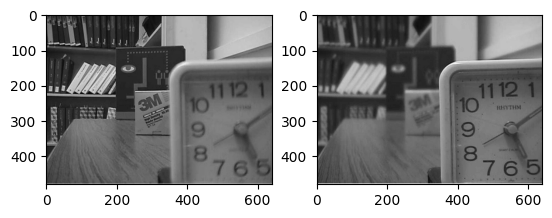

In [156]:
# 讀取會用到的照片
file_DWT_1 = './C1HW06-2022/Part 2 Images/Image Set 1/clock1.JPG'
img_DWT_1 = cv2.imread(file_DWT_1, 0)
file_DWT_2 = './C1HW06-2022/Part 2 Images/Image Set 1/clock2.JPG'
img_DWT_2 = cv2.imread(file_DWT_2, 0)
plt.subplot(1, 2, 1)
plt.imshow(img_DWT_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_DWT_2, cmap='gray')

In [157]:
# DWT 轉換
def DWT_process(img, wavelet = 'haar'):
    nr, nc = img.shape
    # print(img.shape)
    coeffs = pywt.dwt2(img, wavelet)
    LL, (LH, HL, HH) = coeffs # shape會變成原圖的一半 (array, tuple): tuple
    # print(LL.shape)

    # 製作wavelet綜合顯示圖
    nr1, nc1 = LL.shape[:2]
    g = np.zeros([nr1 * 2, nc1 * 2], dtype='uint8')

    LL_normalize = np.zeros([nr1, nc1])
    cv2.normalize(LL, LL_normalize, 0, 255, cv2.NORM_MINMAX)
    k = 128 # 提高LH, HL, HH 亮度
    g[0:nr1, 0:nc1] = np.uint8(LL_normalize)

    g[0:nr1, nc1:nc1 * 2] = np.uint8(np.clip(LH + k, 0, 255))
    g[nr1:nr1 * 2, 0:nc1] = np.uint8(np.clip(HL + k, 0, 255))
    g[nr1:nr1 * 2, nc1:nc1 * 2] = np.uint8(np.clip(HH + k, 0, 255))


    # plt.imshow(g, cmap='img_gray')
    return coeffs, g


In [158]:
# 兩張照片合成，透過小波轉換變清晰
def DWT_merge(img1, img2, wavelet = 'haar'):
    co_img1, g1 = DWT_process(img1, wavelet=wavelet)
    LL1, (LH1, HL1, HH1) = co_img1
    co_img2, g2 = DWT_process(img2, wavelet=wavelet)
    LL2, (LH2, HL2, HH2) = co_img2

    # 用作業上的指示合成
    def max(A, B):
        h, w = A.shape
        C = np.zeros(A.shape)
        for i in range(h):
            for j in range(w):
                if (A[i, j] > B[i, j]):
                    C[i, j] = A[i, j]
                else:
                    C[i, j] = B[i, j]
        return C
    
    LL = (LL1 + LL2) / 2
    LH = max(LH1, LH2)
    HL = max(HL1, HL2)
    HH = max(HH1, HH2)
    coeffs_merge = (LL, (LH, HL, HH))
    result = pywt.idwt2(coeffs_merge, wavelet)
    return result
    


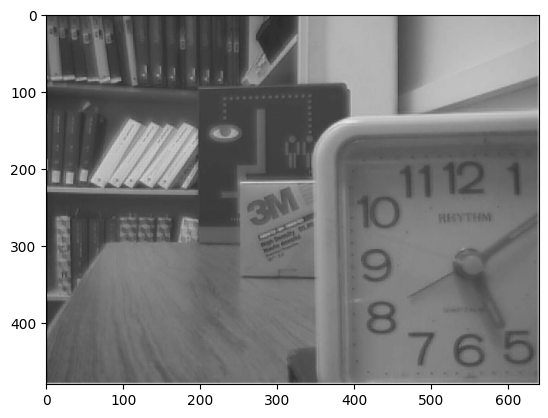

In [169]:
def do_pywt(img_list):
    for i in range(len(img_list) - 1):
        if (i == 0):
            a = cv2.imread(img_list[i], 0)
            b = cv2.imread(img_list[i + 1], 0)
            c = DWT_merge(a, b)
        else:
            a = c
            b = cv2.imread(img_list[i + 1], 0)
            c = DWT_merge(a, b)
    return c
file = ['./C1HW06-2022/Part 2 Images/Image Set 1/clock1.JPG', './C1HW06-2022/Part 2 Images/Image Set 1/clock2.JPG']
plt.imshow(do_pywt(file), cmap='gray')

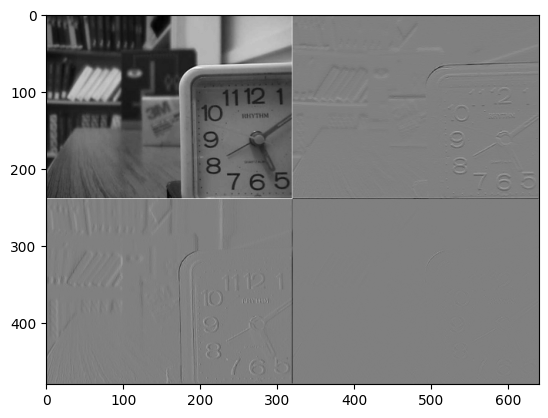

In [164]:
coeffs, g = DWT_process(img_DWT_2)
plt.imshow(g, cmap='gray')

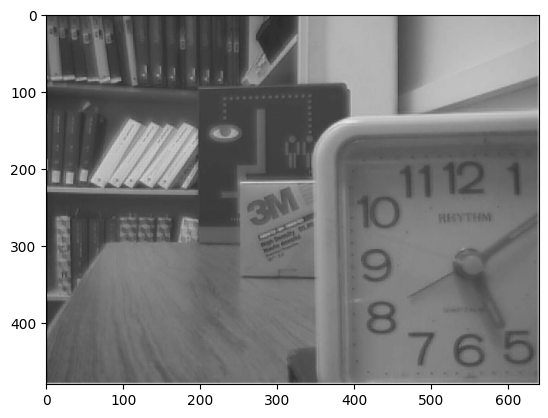

In [165]:
img_merge = DWT_merge(img_DWT_1, img_DWT_2)
plt.imshow(img_merge, cmap='gray')

# Part 3 

In [166]:
def Hough_Transform(img, canny_TH1, canny_TH2, Hough_TH):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR 2 GRAY
    canny_img = cv2.Canny(img, canny_TH1, canny_TH2, apertureSize=3)
    lines = cv2.HoughLines(canny_img, 1, np.pi / 180, Hough_TH)
    _, binary_edge = cv2.threshold(canny_img, 127 , 255 , cv2.THRESH_BINARY)
    _, binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    Hough_img = img.copy()
    perimeter = np.count_nonzero(binary_edge) / 4
    area = np.count_nonzero(binary_image) / 2
    for line in lines:
        rho = line[0][0]
        theta= line[0][1]
        if  (theta < (np.pi / 4)) or (theta > (3 * np.pi / 4)):
            pt1 = (int(rho / np.cos(theta)),0)
            pt2 = (int((rho - Hough_img.shape[0] * np.sin(theta)) / np.cos(theta)), Hough_img.shape[0])  
        else:
            pt1 = (0, int(rho / np.sin(theta)))
            pt2 = (Hough_img.shape[1], int((rho - Hough_img.shape[1] * np.cos(theta)) / np.sin(theta)))
        cv2.line(Hough_img, pt1, pt2, (0, 0, 0), (5))
    return (img, canny_img, Hough_img), (perimeter, area)


(467.5, 48435.5)


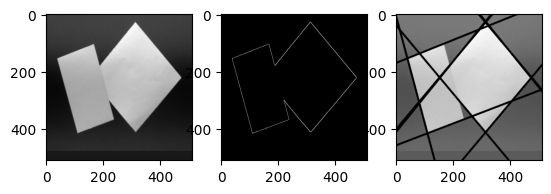

In [167]:
file_part3 = './C1HW06-2022/Part 3 Image/rects.bmp'
img_part3 = cv2.imread(file_part3)
image, parameter = Hough_Transform(img_part3, 50, 150, 100)
print(parameter)
plt.subplot(1, 3, 1)
plt.imshow(image[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(image[1], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(image[2], cmap='gray')
